Siyu Wu January 2, 2024

Overview: The primary objective of this analysis was to develop a model capable of discerning the underlying patterns between the feature "x" and the normalized target (y/dy) in a regression task. The normalization of the target variable, as observed in the original model's loss function design, appears to use 'dy' as a scaling factor, likely to account for variability or uncertainty in 'y'.

Model Improvements in PyTorch Neural Network:

General Parameters: The model's parameters were generally well-tuned. Although there's potential for increasing the batch size, the most significant improvement was observed by altering the activation function.

Activation Function: Transitioning from a Sigmoid to a ReLU activation function resulted in considerable performance enhancement. This change aligns well with the dataset's characteristics and the nature of the regression task. Post this modification, the training and test loss values showed substantial reductions. for example, for 200 epochs, the training loss decreased from 229+ to 13.2, while the test loss reduced from 234 value] to 12.3.

Comparative Analysis with TabNet:

It's good to see using Torch NN in tabular data, but I would recommend use TabNet, a deep learning approach specifically tailored for tabular data.
The TabNet model demonstrated soild performance compared to both Sigmoid and ReLU configurations in the PyTorch Neural Network setup. It worth to note that ReLU > TabNet > Sigmiod in this task.

In [1]:
!pip install torchviz

In [2]:
# Import relevant python modules
import sys, os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# The datasets needed are computed by the `ComputeGluon.py` script in PseudoData
filename1='https://raw.githubusercontent.com/rabah-khalek/TF_tutorials/master/PseudoData/gluon_NNPDF31_nlo_pch_as_0118_xmin1e-3.dat'
filename2='https://raw.githubusercontent.com/rabah-khalek/TF_tutorials/master/PseudoData/gluon_NNPDF31_nlo_pch_as_0118_xmin1e-4.dat'
filename3='https://raw.githubusercontent.com/rabah-khalek/TF_tutorials/master/PseudoData/gluon_NNPDF31_nlo_pch_as_0118_xmin1e-5.dat'
filename4='https://raw.githubusercontent.com/rabah-khalek/TF_tutorials/master/PseudoData/gluon_NNPDF31_nlo_pch_as_0118_xmin1e-6.dat'

# Headers to skip
lines_to_skip = 5

# Defining the columns (cv = central value, sd = standard deviation)
columns=["x", "gluon_cv", "gluon_sd"]

# Loading data from txt file
# Change filename1 to another filename for data that extends to lower x
# (see exercises at the bottom of this notebook)
df = pd.read_csv(filename1,
                 sep="\s+",
                 skiprows=lines_to_skip,
                 usecols=[0,1,2],
                 names=columns)

# Splitting data randomly to train and test using the sklearn library
df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

# Sort the split data according to their x values
df_train = df_train.sort_values("x")
df_test = df_test.sort_values("x")

print("Data parsing is done!")

Data parsing is done!


In [3]:
print(df_train)

            x  gluon_cv  gluon_sd
0    0.001000  4.480675  0.523964
1    0.001007  4.478519  0.520743
2    0.001014  4.476361  0.517539
3    0.001021  4.474202  0.514349
4    0.001028  4.472040  0.511176
..        ...       ...       ...
993  0.952796 -0.001109  0.003990
994  0.959401 -0.000878  0.003423
996  0.972747 -0.000634  0.002707
997  0.979490 -0.000494  0.002179
999  0.993116 -0.000144  0.000697

[800 rows x 3 columns]


In [4]:
!pip install pytorch-tabnet

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetRegressor

In [6]:
# Split the training data into training and validation sets
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)

# Preparing the feature - only the 'x' column
X_train = df_train[['x']].values
X_test = df_test[['x']].values

# Preparing the target - 'gluon_cv' divided by 'gluon_sd'
y_train = (df_train['gluon_cv'] / df_train['gluon_sd']).values.reshape(-1, 1)
y_test = (df_test['gluon_cv'] / df_test['gluon_sd']).values.reshape(-1, 1)

model = TabNetRegressor()

model.fit(
    X_train=X_train, 
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Include training set for training loss and test set for testing loss
    eval_name=['train', 'test'], 
    max_epochs=1000, 
    patience=50, 
    batch_size=256, 
    virtual_batch_size=128
)

epoch 0  | loss: 438.91591| train_mse: 416.03288| test_mse: 448.5305|  0:00:00s
epoch 1  | loss: 398.88043| train_mse: 403.90361| test_mse: 436.06944|  0:00:00s
epoch 2  | loss: 357.93239| train_mse: 388.96206| test_mse: 420.65107|  0:00:00s
epoch 3  | loss: 351.18521| train_mse: 369.49731| test_mse: 400.58746|  0:00:00s
epoch 4  | loss: 308.33459| train_mse: 345.09882| test_mse: 375.37178|  0:00:00s
epoch 5  | loss: 297.41705| train_mse: 316.55272| test_mse: 345.81487|  0:00:00s
epoch 6  | loss: 266.35352| train_mse: 286.80162| test_mse: 314.9353|  0:00:00s
epoch 7  | loss: 233.84503| train_mse: 257.30478| test_mse: 284.22817|  0:00:00s
epoch 8  | loss: 209.80548| train_mse: 228.43574| test_mse: 254.06815|  0:00:00s
epoch 9  | loss: 181.26904| train_mse: 200.313 | test_mse: 224.55849|  0:00:00s
epoch 10 | loss: 148.17924| train_mse: 174.14967| test_mse: 197.02019|  0:00:00s
epoch 11 | loss: 115.81736| train_mse: 149.97225| test_mse: 171.33179|  0:00:00s
epoch 12 | loss: 94.42941| trai

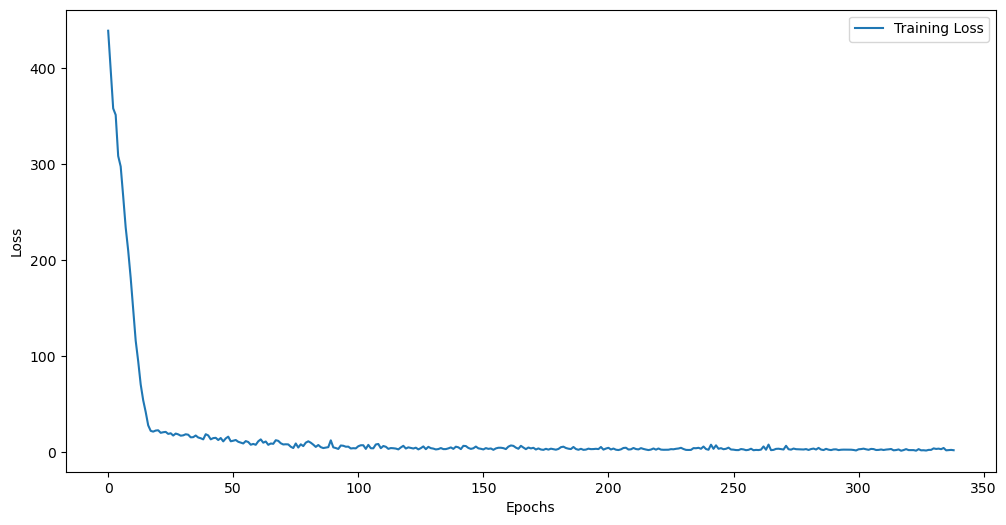

In [7]:
import matplotlib.pyplot as plt

# Extracting the training and validation loss from the model's history
training_loss = model.history['loss']
#validation_loss = model.history['test_loss']  # Assuming 'val_0_loss' is the key for validation loss

# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(training_loss, label='Training Loss')
#plt.plot(validation_loss, label='Validation Loss')
#plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
predictions = model.predict(X_test)

In [9]:
# You may want to reshape predictions if they don't come in the desired shape
predictions = predictions.reshape(-1)

In [10]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.0332884418442525
